In [42]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [5]:
df = pd.read_csv("archive/train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [9]:
pd.set_option('display.max_rows', 10)

In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
#repérer potentiels valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [13]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [14]:
#Renseigner les valeurs manquantes
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [15]:
 #Pour les variables catégoriques on va remplacer les valeurs manquantes par les valeurs qui se répetent le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [16]:
cat_data['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [17]:
#Pour les variables numériques on va remplacer les valeurs manquantes par la précedente de le même colonne
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

False

In [18]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [19]:
#Transformer la colonne target
target_value={'Y': 1, 'N' : 0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [20]:
#Remplacer les valeurs catégoriques par des valeurs numérique
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [21]:
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [22]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [23]:
#Concatenation des deux dataframe
X=pd.concat([cat_data, num_data], axis=1)
y=target

In [24]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [25]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [26]:
#ANALYSE EXPLORATOIRE
# On va commencer par la variable target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [27]:
#La base de données utilisée pour EDA
df=pd.concat([cat_data, num_data, target], axis=1)

le pourcentage des crédits accordés est : 0.6872964169381107
le pourcentage des crédits non accordés est : 0.3127035830618892


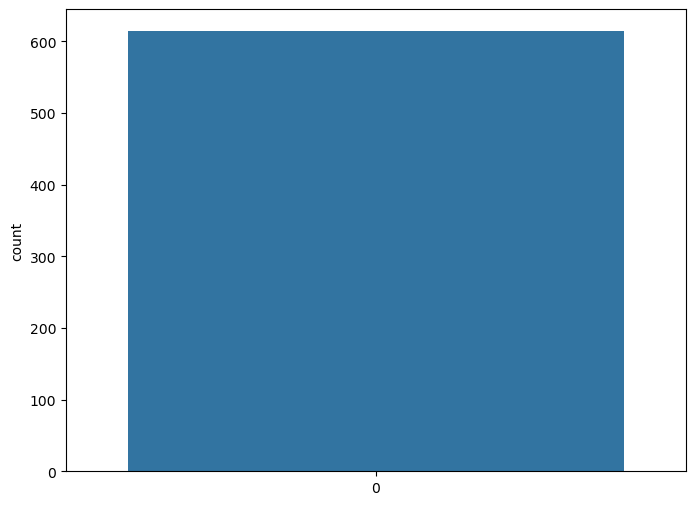

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[1]/len(target)
no=target.value_counts()[0]/len(target)
print(f'le pourcentage des crédits accordés est : {yes}')
print(f'le pourcentage des crédits non accordés est : {no}')

/home/bollore/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


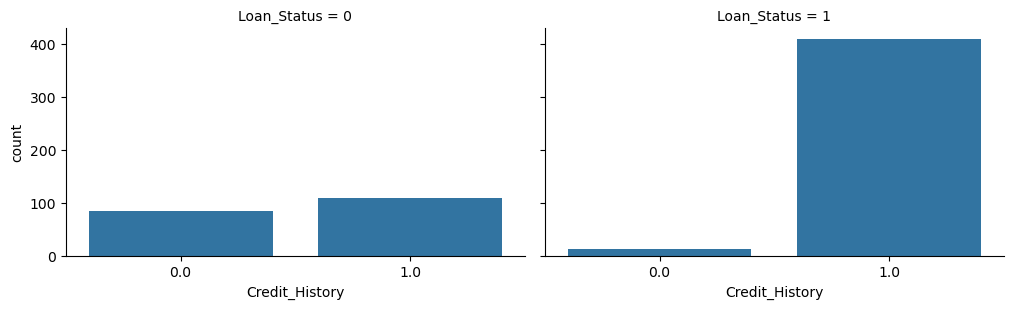

In [29]:
#Credit history
grid=sns.FacetGrid(df,col='Loan_Status', height=3.2,aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

/home/bollore/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


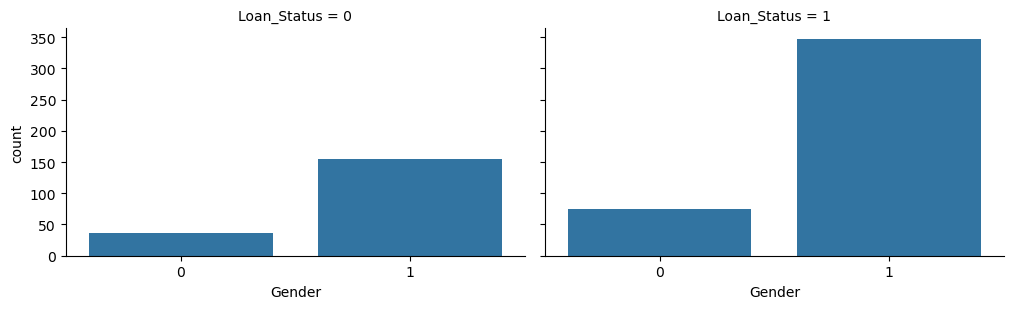

In [30]:
#Gender
grid=sns.FacetGrid(df,col='Loan_Status', height=3.2,aspect=1.6)
grid.map(sns.countplot, 'Gender')

/home/bollore/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


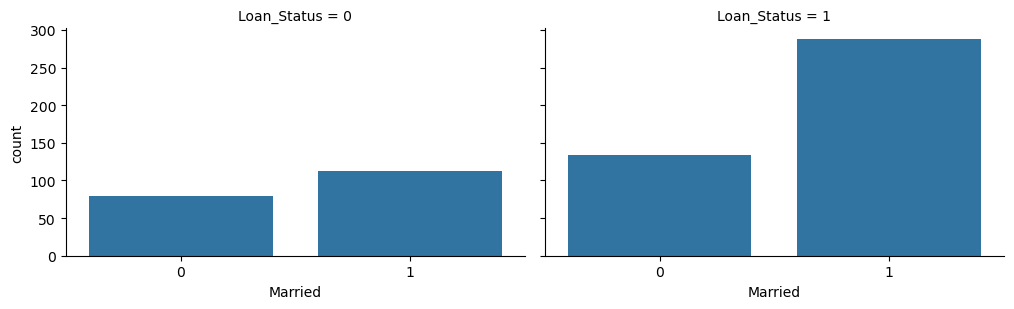

In [31]:
#Marrié
grid=sns.FacetGrid(df,col='Loan_Status', height=3.2,aspect=1.6)
grid.map(sns.countplot, 'Married')

/home/bollore/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


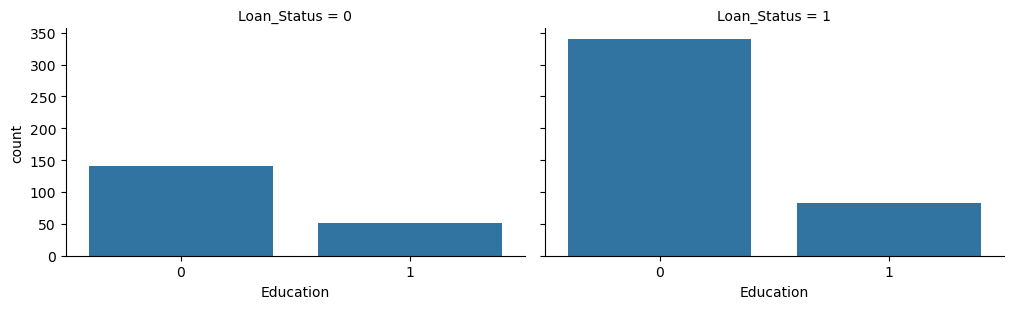

In [32]:
#Education
grid=sns.FacetGrid(df,col='Loan_Status', height=3.2,aspect=1.6)
grid.map(sns.countplot, 'Education')

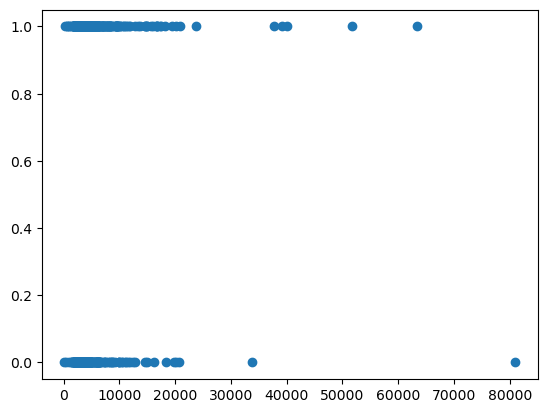

In [33]:
#Revenu
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

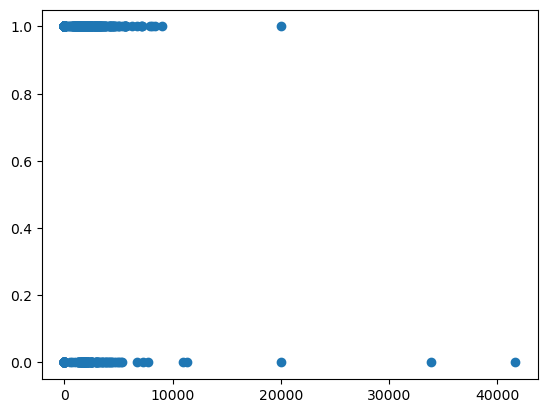

In [34]:
#Conjoint
plt.scatter(df['CoapplicantIncome'], df['Loan_Status'])

In [35]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [36]:
#Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
print('X_train taille', X_train.shape)
print('X_test taille', X_test.shape)
print('y_train taille', y_train.shape)
print('y_test taille', y_test.shape)

X_train taille (491, 11)
X_test taille (123, 11)
y_train taille (491,)
y_test taille (123,)


In [44]:
# On va appliquer 3 algoithles [Logistic Regression, KNN, Decision Tree]
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
}
# La fonction de précision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la précision du modèle est: {acc}')
#c'est la fonction d'application des modèles 
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name, ':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la précision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la précision du modèle est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la précision du modèle est: 0.8455284552845529
------------------------------


/home/bollore/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
X_1=X[['Credit_History','Gender','Married','CoapplicantIncome','ApplicantIncome']]

In [53]:
#Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X_1,y):
    X_train,X_test=X_1.iloc[train],X_1.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
print('X_train taille', X_train.shape)
print('X_test taille', X_test.shape)
print('y_train taille', y_train.shape)
print('y_test taille', y_test.shape)

X_train taille (491, 5)
X_test taille (123, 5)
y_train taille (491,)
y_test taille (123,)


In [49]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la précision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la précision du modèle est: 0.6585365853658537
------------------------------
DecisionTreeClassifier :
la précision du modèle est: 0.8455284552845529
------------------------------


In [54]:
X_2=X[['Credit_History','Married','CoapplicantIncome']]

In [55]:
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X_2,y):
    X_train,X_test=X_2.iloc[train],X_2.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
print('X_train taille', X_train.shape)
print('X_test taille', X_test.shape)
print('y_train taille', y_train.shape)
print('y_test taille', y_test.shape)

X_train taille (491, 3)
X_test taille (123, 3)
y_train taille (491,)
y_test taille (123,)


In [56]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la précision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la précision du modèle est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la précision du modèle est: 0.8455284552845529
------------------------------
